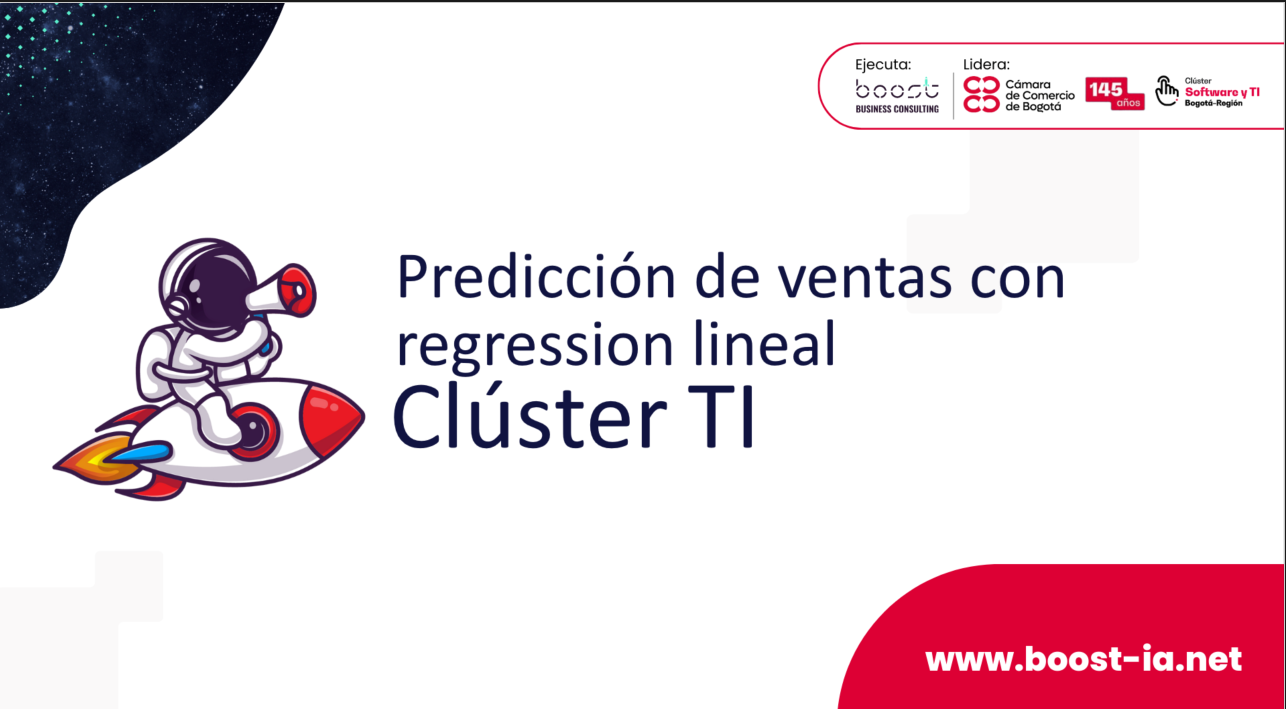

# **Predicción de ventas**

"Más allá de las predicciones: Dominando el arte de pronosticar las ventas"

"Las ventas son el motor de cualquier negocio. ¿Cómo podemos anticiparnos a la demanda y optimizar nuestras estrategias comerciales? La respuesta está en los datos y en poderosas herramientas de análisis como la regresión lineal.

En este taller, exploraremos una variedad de algoritmos de regresión (Regresión Lineal, Ridge, Lasso, ElasticNet, Árboles de Decisión, Random Forest, Gradient Boosting y Support Vector Regressor) para construir modelos predictivos de ventas precisos y robustos.


Datos: https://www.kaggle.com/datasets/ashydv/advertising-dataset

# Nombre de la empresa: xxxxxxxxxxxxxxxxxxx

# Nit de la empresa: xxxxxxxxx

# Importación de librerias

In [5]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1e8effe510e8142e4406f70904a47df451abc0a9fa5ce7c02ed4d52c00abd1a0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from ydata_profiling import ProfileReport

# Cargando el dataset

In [7]:
# Carga de dataset

#url="https://drive.google.com/file/d/1LwZSXYau69eift62JafmTQ9qsbOxyKrs/view?usp=drive_link"
#url='https://raw.githubusercontent.com/foramirez50/introduccion/refs/heads/master/advertising.csv?token=GHSAT0AAAAAAC2QDTTTRV3VCB2P27LKYJX4ZZXKLJA'
#df = pd.read_csv(url,sep=',')
df = pd.read_csv('/content/advertising.csv')

# Mostrar primeras filas
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploración de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# Revisando valores faltantes
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [12]:
# Revisando valores duplicados
print("\nValores duplicados en el dataset:")
print(df.duplicated().sum())


Valores duplicados en el dataset:
0


In [13]:
# Resumen estadístico
print("\nResumen Estadístico:")
print(df.describe())


Resumen Estadístico:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [14]:
profile = ProfileReport(df)

In [15]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

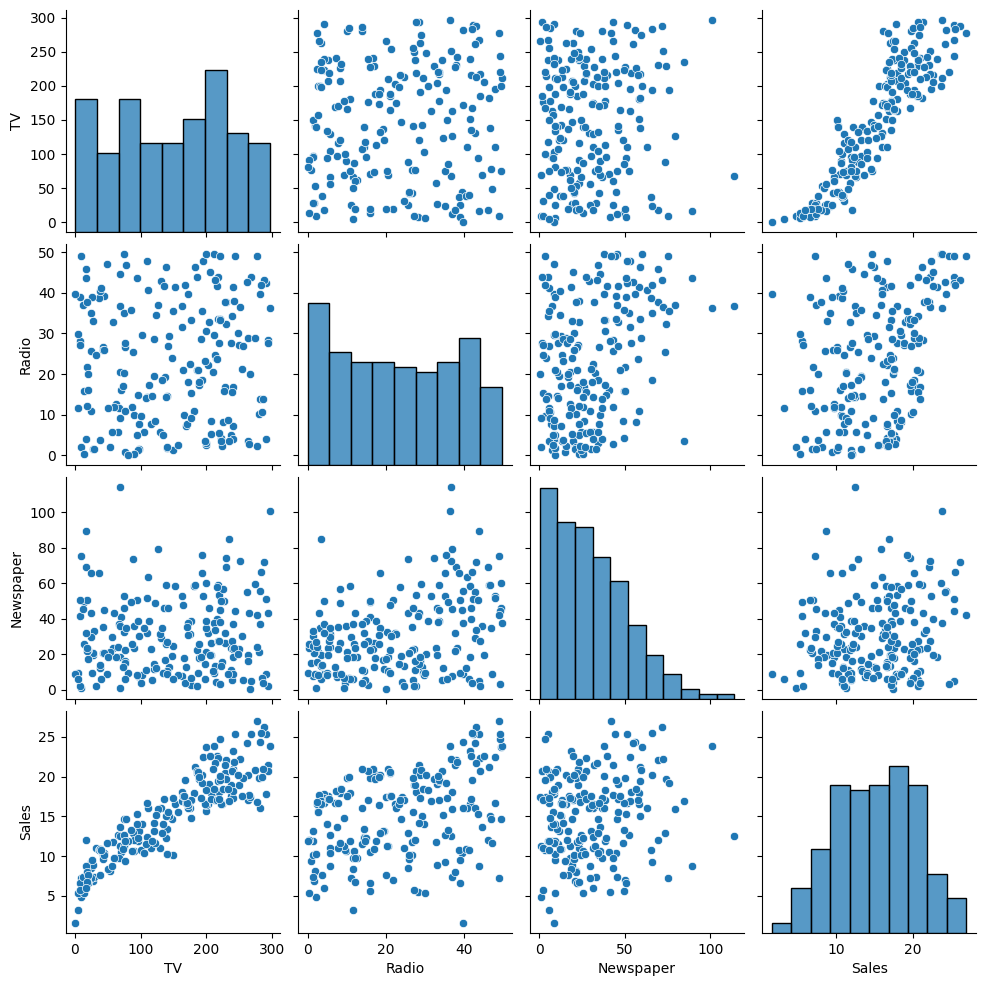

In [16]:
# Graficas de relaciones
sns.pairplot(df)
plt.show()

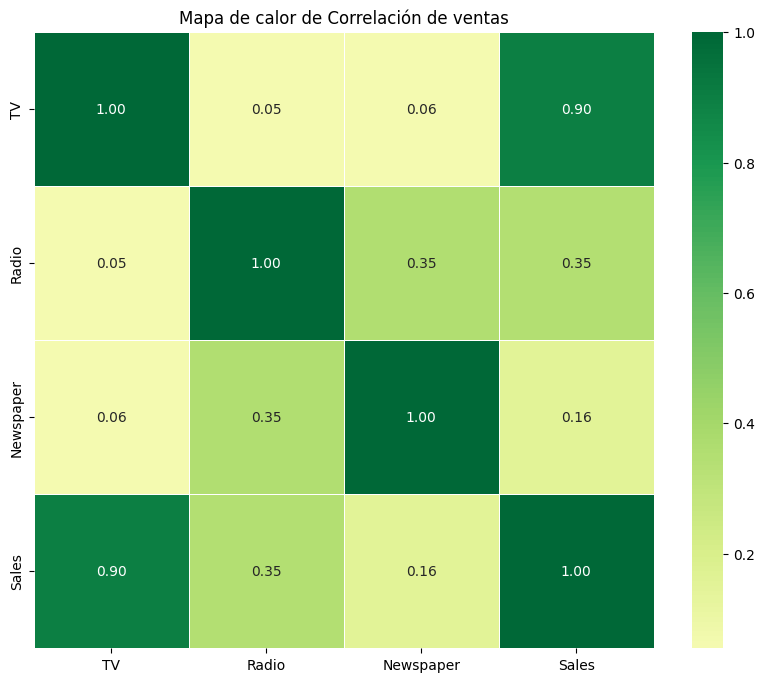

In [18]:
#heatmap para correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt=".2f", center=0, linewidths=0.5)

plt.title('Mapa de calor de Correlación de ventas')
plt.show()

In [ ]:
# Escalando las variables
features = ['TV', 'Radio', 'Newspaper']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9


In [22]:
# Organizando X y Y para entrenamiento
X = df.drop('Sales', axis=1)
y = df['Sales']

# Dividiendo el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

# Creando el diccionario de resultados
results = {}

# Loop para los modelos, entrenamiento y calculando métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R-cuadrado': r2}

# Convirtiendo los resultados para mejor visualización
results_df = pd.DataFrame(results).T

# Imprimir los resultados
print(results_df)

                               MSE  R-cuadrado
Linear Regression         2.907757    0.905901
Ridge Regression          2.907796    0.905900
Lasso Regression          2.928911    0.905217
ElasticNet Regression     2.920102    0.905502
Decision Tree             2.651250    0.914202
Random Forest             1.306479    0.957721
Gradient Boosting         1.251272    0.959507
Support Vector Regressor  3.499087    0.886765


In [24]:
# Encontrando el mejor modelo basado en una combinación de pesos del MSE y el R-cuadrado
weights = {'MSE': 1,  # Minimisando MSE (peso positivo, se invierte después)
           'R-cuadrado': 1}  # Maximisando R-cuadrado (peso positivo)

# NOrmalizando pesos para que sumen 1, para una comparación balanceada
total_weight = sum(weights.values())
normalized_weights = {name: weight / total_weight for name, weight in weights.items()}

# Calcular pesos para cada modelo
model_scores = {}
for name, result in results.items():
    # Invirtiendo pesos de MSE para la minimizacion del peso
    weighted_score = result['MSE'] * normalized_weights['MSE'] * -1 + result['R-cuadrado'] * normalized_weights['R-cuadrado']
    model_scores[name] = weighted_score

# Identificando el modelo con el score más alto
best_model_name = max(model_scores, key=model_scores.get)

print("\nEl Mejor Modelo:")
print(f"{best_model_name}")
print("Metricas:")
for metric, value in results[best_model_name].items():
    print(f"{metric}: {value:.4f}")


El Mejor Modelo:
Gradient Boosting
Metricas:
MSE: 1.2513
R-cuadrado: 0.9595


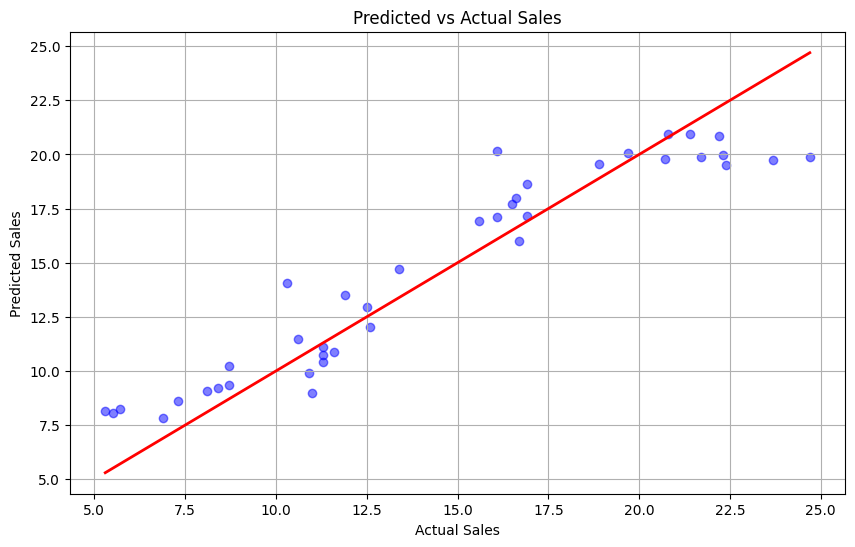

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.grid(True)
plt.show()